# HW 4

## Yakup Can Karacaoğlu 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def safelog2(x):
    if x == 0:
        return(0)
    else:
        return(np.log2(x))

## Import Data

In [71]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",",skip_header=1)

#Number of the data set
N = data_set.shape[0]

# get X and y values
X = data_set[:,0]
y = data_set[:, 1].astype(int)

#Seperate the train set
x_train = X[: 150,]
y_train = y[: 150,]
N_train = x_train.shape[0]

#Seperate the test set
x_test = X[150:,]
y_test = y[150:,]
N_test = x_test.shape[0]


## Initialization

In [72]:
# create necessary data structures
node_indices = {}
is_terminal = {}
need_split = {}

node_features = {}
node_splits = {}
node_frequencies = {}

# put all training instances into the root node
node_indices[1] = np.array(range(N_train))
is_terminal[1] = False
need_split[1] = True

## Tree Inference

In [73]:
def func(P):
    while True:
        # find nodes that need splitting
        split_nodes = [key for key, value in need_split.items()
                        if value == True]
        # check whether we reach all terminal nodes
        if len(split_nodes) == 0:
            break

        # find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            node_frequencies[split_node] = np.mean(y_train[data_indices])

            if len(data_indices) <= P:
                is_terminal[split_node] = True
            else:
                is_terminal[split_node] = False
                unique_values = np.sort(np.unique(x_train[data_indices]))
                split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
                split_scores = np.repeat(0.0, len(split_positions))
                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] <= \
                                    split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] > \
                                    split_positions[s]]
                    split_scores[s] = np.sum((y_train[left_indices] - np.mean(y_train[left_indices]))**2) / len(data_indices) + np.sum((y_train[right_indices] - np.mean(y_train[right_indices]))**2) / len(data_indices)

                best_split = split_positions[np.argmin(split_scores)]
                node_splits[split_node] = best_split

                # create left node using the selected split
                left_indices = data_indices[x_train[data_indices] <= best_split]
                if len(left_indices > 0):
                    node_indices[2 * split_node] = left_indices
                    is_terminal[2 * split_node] = False
                    need_split[2 * split_node] = True

                # create right node using the selected split
                right_indices = data_indices[x_train[data_indices] > best_split]
                if len(right_indices > 0):
                    node_indices[2 * split_node + 1] = right_indices
                    is_terminal[2 * split_node + 1] = False
                    need_split[2 * split_node + 1] = True



## Call the Tree Function

In [74]:
#Call function with the P = 25
func(25)

## Prediction

In [75]:
def prediction_func(point):
    key = 1
    while is_terminal[key] == False:
        if point < node_splits[key]:
            key = key * 2
        else:
            key = key * 2 + 1
    return node_frequencies[key]

data_interval = np.linspace(1.5, 5.2, 371)

y_predicted = []
for x in data_interval:
    y_predicted.append(prediction_func(x))


## Plot

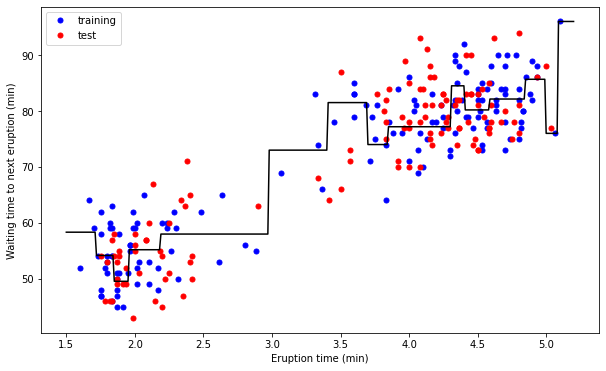

In [76]:
plt.figure(figsize = (10, 6))
plt.plot(x_train, y_train, "b.", markersize=10)
plt.plot(x_test, y_test, "r.", markersize=10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(["training", "test"], loc ="upper left")
plt.plot(data_interval, y_predicted, "k-")

plt.show()

## RMSE

In [39]:
error = 0
for i in range(N_train):
    for j in range(len(y_predicted) - 1):
        if((x_train[i] > data_interval[j]) & (x_train[i] <= data_interval[j+1])):
            error += (y_train[i] - y_predicted[j + 1])**2

rmse = (np.sqrt(error / N_train))
            
print("RMSE on training set is ", rmse, " when P is 25")


RMSE on training set is  4.541214189194451  when P is 25


In [41]:
error = 0
for i in range(N_test):
    for j in range(len(y_predicted) - 1):
        if((x_test[i] > data_interval[j]) & (x_test[i] <= data_interval[j+1])):
            error += (y_test[i] - y_predicted[j+1])**2

rmse = (np.sqrt(error / N_test))
            
print("RMSE on test set  is ", rmse, " when P is 25")

#It gives the RMSE same with the training set in description, but it is a bit different for the train I did not understant why

RMSE on test set  is  6.6180729234323925  when P is 25


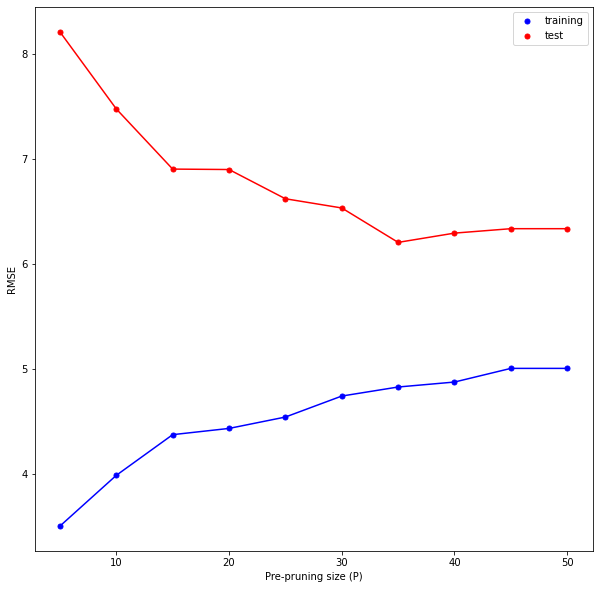

In [42]:
# List of P parameters
p_parameters = np.linspace(5,50,num = 10).astype(int)

#RMSE result holder lists
train_rmse = []
test_rmse = []

for P in p_parameters:
    # restart the node dictionaries for every P
    node_indices = {}
    is_terminal = {}
    need_split = {}

    node_features = {}
    node_splits = {}
    node_frequencies = {}

    node_indices[1] = np.array(range(N_train))
    is_terminal[1] = False
    need_split[1] = True
    
    #Call function for P
    func(P)
    #Prediction
    y_predicted = []
    for x in data_interval:
        y_predicted.append(prediction_func(x))
    
    #RMSE calculation for train
    error = 0
    for i in range(N_train):
        for j in range(len(y_predicted) - 1):
            if((x_train[i] > data_interval[j]) & (x_train[i] <= data_interval[j+1])):
                error += (y_train[i] - y_predicted[j + 1])**2

    rmse = (np.sqrt(error / N_train))
    train_rmse.append(rmse)
    
    #RMSE calculation for test
    error = 0
    for i in range(N_test):
        for j in range(len(y_predicted) - 1):
            if((x_test[i] >= data_interval[j]) & (x_test[i] < data_interval[j+1])):
                error += (y_test[i] - y_predicted[j + 1])**2
                
    rmse = (np.sqrt(error / N_test))
    test_rmse.append(rmse)

plt.figure(figsize = (10, 10))
plt.plot(p_parameters, train_rmse, "b.", markersize=10 )
plt.plot(p_parameters, test_rmse, "r.", markersize=10 )
plt.plot(p_parameters,train_rmse,"b-")
plt.plot(p_parameters,test_rmse,"r-")
plt.xlabel("Pre-pruning size (P)")
plt.ylabel("RMSE")
plt.legend(["training", "test"], loc ="upper right")
plt.show()